# Decision trees and random forests

Decision trees build classification or regression models in the form of a tree structure. Creating a binary decision tree is a process of dividing up the input space. A greedy and recursive approach is used to recursively create binary splits in the input space. At each step, all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner as the optimal split point is chosen in each step without checking for whether or not the split will lead to the lowest possible cost several levels down. 

In order to make a prediction for a given observation, we typically use the mean (regression) or the mode (classification) of the training observations in the region to which the observation belongs. 

### A. Classification using decision trees

1. Import the make_moons dataset from sklearn using $100$ samples, noise $= 0.35$ and a fixed random state = $42$.
2. Fit and visualize a decision tree classifier. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. 

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns

In [73]:
def plot_decision_boundary(tree, X, y, axes=[0, 2.5, 0, 1.2], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(["0","1"],loc="upper right", fontsize=14)
        
        


Accuracy = 100%


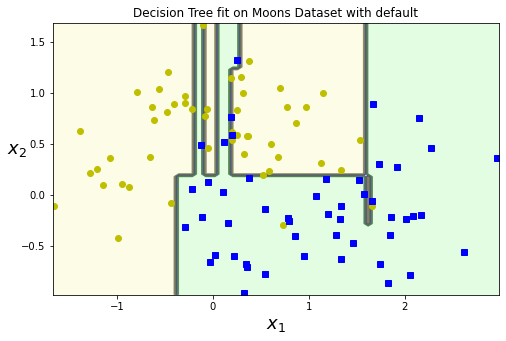

In [74]:
##PART A
#Loading data
Xm,ym = make_moons(n_samples=100,random_state=42,noise = 0.35)
#Initializing Decision Tree Model
DcT = DecisionTreeClassifier()
#Training
classifier = DcT.fit(Xm,ym)

#Plotting/Visualization
plt.figure(figsize=(8,5))
plt.title("Decision Tree fit on Moons Dataset with default")
plot_decision_boundary(classifier,Xm,ym,[min(Xm[:,0])-0.015,max(Xm[:,0])+0.015,min(Xm[:,1])-0.015,max(Xm[:,1])+0.015])
#Calculating classification accuracy
acc = classifier.score(Xm,ym)
print("Accuracy = %.f"%(acc*100)+"%")

#### Q. Comment on the overfitting nature of the Decision trees

Overfitting is a commonly ocurring phenomenon when it comes to decision trees. Overfitting is a result of high variance in the model and can lead to poor results on unseen data.  A naive implementation of decision trees can result in very a complex tree structure with large number of nodes causing overfitting on training data. Since we aim to minimise the impurity of the partioned data at each step of the algorithm, a higher number of partitions are made to achieve a greater depth and hence low or zero impurity. Even if the data is noisy or having outliers, decision trees tend to fit complex boundaries to accomodate noise and outlier points. For the same reason, Decision Trees are very less robust to variation in data. For example, in the decision tree model (with maximum depth set to a default value of 6) trained on the Make Moons dataset, although the accuracy is 100%, a visual inspection of the scatter plot with the generated decision boundaries suggests that the algorithm has partitioned tiny regions in the data space to accommodate just a few yellow and blue points, which is undesirable in general.

### B. Overfitting in decision tree classifiers

1. List and explain in a few lines, three of the regularization hyperparameters used while building a decision tree and why they might help reduce overfitting of a decision tree model.
2. Now fit a decision tree classifier on the same dataset using the min_samples_leaf hyperparameter set to $4$. Plot the decision boundaries and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 
3. Fit and visualize a decision tree classifier after setting the maximum depth of nodes as $5$. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. and compare with the model fit without any hyperparameters. Which model do you think will generalize better to the test dataset? 

**Question B.1**
The hyperparameters of decision tree models that can be used for regularization are:
 - **Maximum depth of the tree (```max_depth```):** Upon decreasing the maximum depth of the tree to an appropriate value, we can enforce the decision tree algorithm to prevent it from building large and complex trees with a higher depth, thereby preventing overfitting.
 - **Minimum number of samples in the leaf nodes (```min_sample_leaf```):** When we allow smaller number of samples to be allowed inside a leaf, the decision tree algorithm tends to reach there by increasing the depth of the tree, again resulting in overfitting. Setting a higher threshold for the number of samples present to be considered as a leaf node can serve as a good early stopping condition and prevents overfitting.
 - **Pruning - Complexity Parameter (```ccp_alpha```):** Another way to prevent overfitting is pruning of the decision tree. It removes sections of the tree that are uncritical and redundant to classify instances. Pruning is parametrized by the cost complexity parameter $\alpha$, which when assigned a higher value allows higher number of sections of the tree to be pruned.

Accuracy = 95%


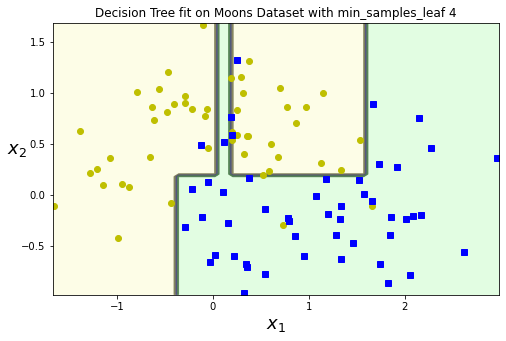

In [75]:
DcT = DecisionTreeClassifier(random_state=0,min_samples_leaf=4)
#Training
classifier = DcT.fit(Xm,ym)
#Plotting/Visualization
plt.figure(figsize=(8,5))
plt.title("Decision Tree fit on Moons Dataset with min_samples_leaf 4")
plot_decision_boundary(classifier,Xm,ym,[min(Xm[:,0])-0.015,max(Xm[:,0])+0.015,min(Xm[:,1])-0.015,max(Xm[:,1])+0.015])
#Calculating classification accuracy
acc = classifier.score(Xm,ym)
print("Accuracy = %.f"%(acc*100)+"%")

It can be observed that this model which allows a minimum number of 4 samples in the leaf nodes has attempted to prevent overfitting by making the decision boundaries less complex. However, again through visual inspection, we can say that that this model will generalize marginally better than that trained with default hyperparameters. An accuracy of 95% is achieved on the training dataset.

Accuracy = 96%


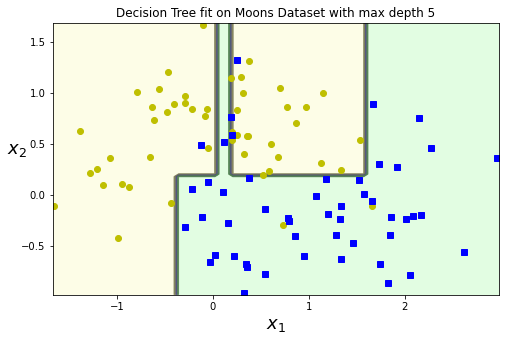

In [76]:
DcT = DecisionTreeClassifier(random_state=0,max_depth=5)
#Training
classifier = DcT.fit(Xm,ym)
#Plotting/Visualization
plt.figure(figsize=(8,5))
plt.title("Decision Tree fit on Moons Dataset with max depth 5")
plot_decision_boundary(classifier,Xm,ym,[min(Xm[:,0])-0.015,max(Xm[:,0])+0.015,min(Xm[:,1])-0.015,max(Xm[:,1])+0.015])
#Calculating classification accuracy
acc = classifier.score(Xm,ym)
print("Accuracy = %.f"%(acc*100)+"%")

It can be observed that this model which allows a maximum depth as 5 has attempted to prevent overfitting by making the decision boundaries less complex. Through visual inspection, this model is quite similar to the model trained with maximum depth as 4, and might achieve a slight improvement in terms of generalization on unseen data, compared to the unregularized model. A training accuracy of 96% is achieved.

#### Q. Comment on the boundary surface of the decision tree. 
Hint: Observe the orthogonality of the boundary

It can be observed that the decision boundaries generated by the decision tree model are non-linear. However, a single partition (at any intermediate iteration) is a linear boundary that divides the vector space into two. A hierarchical combination of such linear splits generates a non-linear boundary structure. Furthermore, since we split along only one axial direction (corresponding to a single feature) at a time while partitioning the space, orthogonality can be observed in the decision boundary lines.

### C. Linear classifiers vs decision tree classifiers

In [67]:
#Generate 100 points [x1, x2] in the 2D plane using np.random.rand() for -0.5<x1<0.5 and -0.5<x2<0.5
np.random.seed(2030)
x = np.random.rand(100,2) - 0.5
y = np.zeros(100)
#Assign a label of 1 to all points having x1>0.0 and 0 otherwise
y[x[:,0]>0] = 1
#Rotate the dataset by 45 degrees in the [x1,x2] plane
rot = [[0.414,-0.414],[0.414,0.414]]
x_rot = np.matmul(rot,x.T)
x_rot = x_rot.T

1. Fit a linear Logistic Regression model and Decision Tree on the x_rot
2. Fit a linear Logistic Regression model and Decision tree on the make_moons dataset generated in A(1)

#### Part C.1

Accuracy = 93%


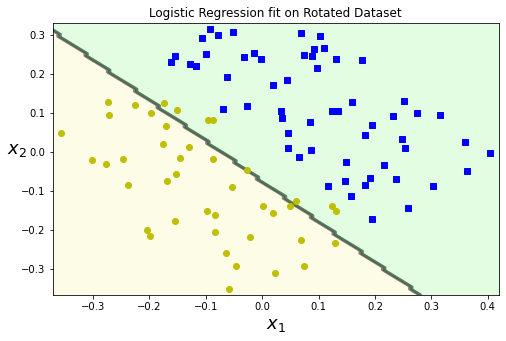

In [77]:
log_reg = LogisticRegression().fit(x_rot,y)
plt.figure(figsize=(8,5))
plt.title("Logistic Regression fit on Rotated Dataset")
plot_decision_boundary(log_reg,x_rot,y,[min(x_rot[:,0])-0.015,max(x_rot[:,0])+0.015,min(x_rot[:,1])-0.015,max(x_rot[:,1])+0.015])
acc = log_reg.score(x_rot,y)
print("Accuracy = %.f"%(acc*100)+"%")

Accuracy = 100%


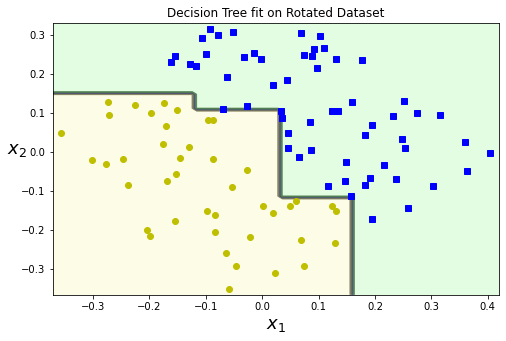

In [78]:
DcT_rot = DecisionTreeClassifier(random_state=0).fit(x_rot,y)
plt.figure(figsize=(8,5))
plt.title("Decision Tree fit on Rotated Dataset")
plot_decision_boundary(DcT_rot,x_rot,y,[min(x_rot[:,0])-0.015,max(x_rot[:,0])+0.015,min(x_rot[:,1])-0.015,max(x_rot[:,1])+0.015])
acc = DcT_rot.score(x_rot,y)
print("Accuracy = %.f"%(acc*100)+"%")

#### Part C.2

Accuracy = 100%


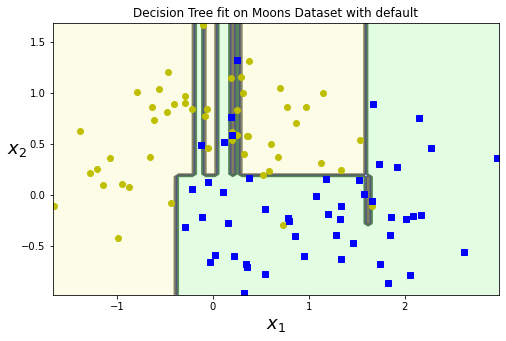

In [79]:
#Decision Tree on Moon Dataset
DcT = DecisionTreeClassifier()
#Training
classifier = DcT.fit(Xm,ym)

#Plotting/Visualization
plt.figure(figsize=(8,5))
plt.title("Decision Tree fit on Moons Dataset with default")
plot_decision_boundary(classifier,Xm,ym,[min(Xm[:,0])-0.015,max(Xm[:,0])+0.015,min(Xm[:,1])-0.015,max(Xm[:,1])+0.015])
#Calculating classification accuracy
acc = classifier.score(Xm,ym)
print("Accuracy = %.f"%(acc*100)+"%")

Accuracy = 86%


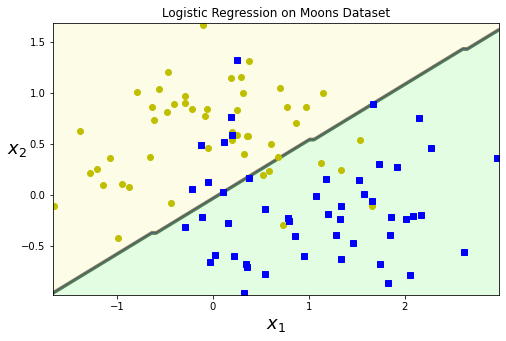

In [80]:
#Logistic Regeression on Moon Dataset
log_reg = LogisticRegression().fit(Xm,ym)
plt.figure(figsize=(8,5))
plt.title("Logistic Regression on Moons Dataset")
plot_decision_boundary(log_reg,Xm,ym,[min(Xm[:,0])-0.015,max(Xm[:,0])+0.015,min(Xm[:,1])-0.015,max(Xm[:,1])+0.015])
acc = log_reg.score(Xm,ym)
print("Accuracy = %.f"%(acc*100)+"%")

#### Q. Compare the performance of Decision Trees and logistic regression on the two datasets

It is noted that the decision tree model achieves 100% accuracy on classifying the Rotated data, while the accuracy of Logistic Regression is just 93%. Likeweise, the decision tree model achieves 100% accuracy on classifying the moons data, while the accuracy of Logistic Regression is just 86%. These observations suggest that the decision tree performs very well on the data being trained, using a complex tree structure resulting in nonlinear decision boundary. On the other hand, Logistic Regression generates a linear boundary that is unable to classify all data points accurately. Logistic Regression also uses the probabilily generated by the sigmoid function to classify the points, resulting in a probablisitic assignment of classes to the data points based on a threshold, as opposed to decision trees.

### D. Regression using decision trees

1. Train a regression tree on the noisy sine dataset given below with three different max_depth values : $2, 3$ and $4$.
2. Plot the divisions of the input space and the predicted value in each division of the input space using the helper function plot_regression_predictions provided to you below for each regression tree model in (1).

In [85]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

#Sine + noise training set 
np.random.seed(10)
X = np.random.rand(150, 1)
y = np.sin(2*np.pi*X) + np.random.randn(150, 1) / 10

#### Part D.1

Accuracy = 87.14%


Text(0.5, 1.0, 'Decision Tree - Max Depth 2')

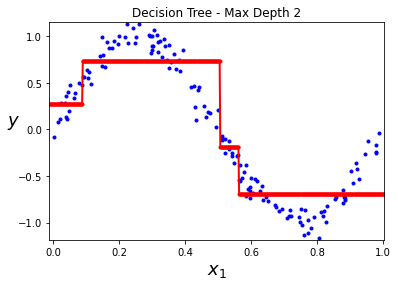

In [86]:
#Decision Tree Regression on Sinusoidal data - maximum depth 2
dec_reg = DecisionTreeRegressor(max_depth=2)
dec_reg.fit(X,y)
#plt.title("Decision Tree Regression on Sinusoidal Data with max depth 2")
plot_regression_predictions(dec_reg,X,y,[min(X)-0.015,max(X)+0.015,min(y)-0.015,max(y)+0.015])
acc = dec_reg.score(X,y)
print("Accuracy = %.2f"%(acc*100)+"%")
plt.title("Decision Tree - Max Depth 2")

Accuracy = 94.78%


Text(0.5, 1.0, 'Decision Tree - Max Depth 3')

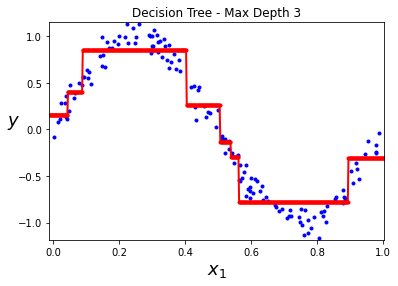

In [87]:
#Decision Tree Regression on Sinusoidal data - maximum depth 3
dec_reg = DecisionTreeRegressor(max_depth=3)
dec_reg.fit(X,y)
plot_regression_predictions(dec_reg,X,y,[min(X)-0.015,max(X)+0.015,min(y)-0.015,max(y)+0.015])
acc = dec_reg.score(X,y)
print("Accuracy = %.2f"%(acc*100)+"%")
plt.title("Decision Tree - Max Depth 3")

Accuracy = 97.59%


Text(0.5, 1.0, 'Decision Tree - Max Depth 4')

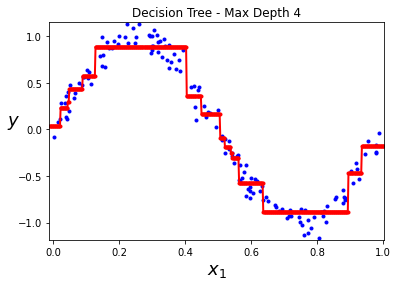

In [88]:
#Decision Tree Regression on Sinusoidal data - maximum depth 4
dec_reg = DecisionTreeRegressor(max_depth=4)
dec_reg.fit(X,y)
plot_regression_predictions(dec_reg,X,y,[min(X)-0.015,max(X)+0.015,min(y)-0.015,max(y)+0.015])
acc = dec_reg.score(X,y)
print("Accuracy = %.2f"%(acc*100)+"%")
plt.title("Decision Tree - Max Depth 4")

As observed, increasing the regularizing parameter maximum depth leads to higher training accuracy, and this might lead to overfitting.

### E. Overfitting in regression trees

1. Fit another regression tree on the dataset used above, with no restrictions on the regularization hyperparameters of the model. Plot the predicted value in all input space divisions.
2. What do you observe? Do regression trees too have a tendency to overfit if no regularization is applied? 

Accuracy = 100.00%


Text(0.5, 1.0, 'Decision Tree - No Regularization')

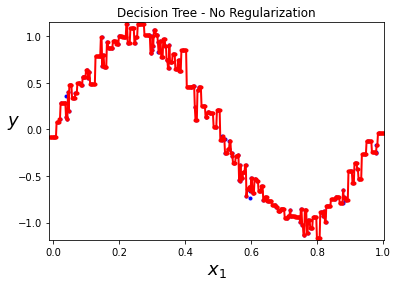

In [165]:
#Decision Tree Regression on Sinusoidal data - No regularization
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X,y)
plot_regression_predictions(dec_reg,X,y,[min(X)-0.015,max(X)+0.015,min(y)-0.015,max(y)+0.015])
acc = dec_reg.score(X,y)
print("Accuracy = %.2f"%(acc*100)+"%")
plt.title("Decision Tree - No Regularization")

It is clearly evident that training the decision tree model on the data with no regularization overfits the data using highly complex decision trees, achieving 100% accuracy. Since the maximum depth was not set, this model kept increasing the depth of the tree until the minimum number of samples in the leaves is reached. On the other hand, we impose early stopping by specicifying the maximum depth parameter, and this results less complex models. As the maximum depth increases, the training accuracy increases.

### F. Fine-tuning a decision tree 

1. Generate a moons dataset using make_moons (n_samples = $10000$, noise=$0.5$). Random seed = 42 
2. Split it into a training set and a test set. 
3. Use grid search with cross-validation (with the help of GridSearchCV) to find good hyperparameter values for max_leaf_nodes and min_samples_split. Try values ranging from $2$ to $35$ for max_leaf_nodes and $2$ to $10$ for min_samples_split. Report the optimal hyperparameter values.
4. Train the decision tree classifier on the full training set using these optimal hyperparameters, and report your model's performance on the test set.

In [90]:
#PART F.1 - Loading 10000 samples of Moons data with noise = 0.5
X_moon,y_moon = make_moons(n_samples=10000,random_state=42,noise=0.5)
#PART F.2 - Train Test Splitting with Test size = 20%
[X_train,X_test,y_train,y_test] = train_test_split(X_moon,y_moon,test_size = 0.2,random_state = 42)


Reporting Best Model
Maximum Leaf Nodes = 16
Minimum Sample Nodes = 2
Training Accuracy of best model = 82.58%


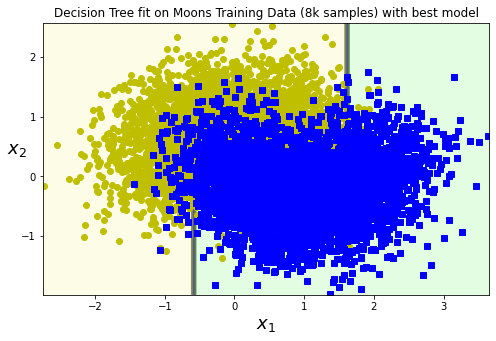

In [96]:
#PART F.3 - Using GridSearchCV for finding the best set of hyperparameters for max_leaf_nodes and min_samples_split of 
#the Decision Tree Classifier
parameters = {"max_leaf_nodes":list(range(2,36)),"min_samples_split":list(range(2,11))}
DcT_search = DecisionTreeClassifier()
classifier = GridSearchCV(DcT_search,parameters)

#PART F.4 Training the classifier on the training set and test set and reporting accuracies
classifier.fit(X_train,y_train)
best_classifier = classifier.best_estimator_
print("Reporting Best Model")
print("Maximum Leaf Nodes = %d"%best_classifier.max_leaf_nodes)
print("Minimum Sample Nodes = %d"%best_classifier.min_samples_split)
print("Training Accuracy of best model = %.2f"%(best_classifier.score(X_train,y_train)*100)+"%")
plt.figure(figsize=(8,5))
plt.title("Decision Tree fit on Moons Training Data (8k samples) with best model")
plot_decision_boundary(best_classifier,X_train,y_train,[min(X_train[:,0])-0.015,max(X_train[:,0])+0.015,min(X_train[:,1])-0.015,max(X_train[:,1])+0.015])

Test Accuracy of best model = 83.10%


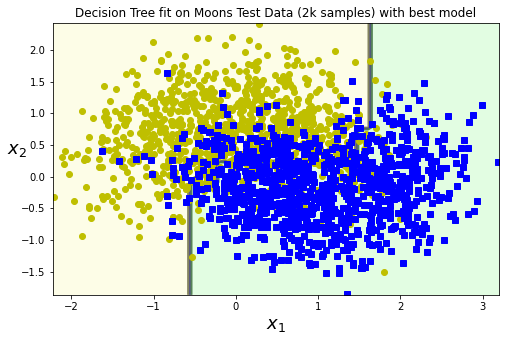

In [97]:
#Performance on the test data
print("Test Accuracy of best model = %.2f"%(best_classifier.score(X_test,y_test)*100)+"%")
plt.figure(figsize=(8,5))
plt.title("Decision Tree fit on Moons Test Data (2k samples) with best model")
plot_decision_boundary(best_classifier,X_test,y_test,[min(X_test[:,0])-0.015,max(X_test[:,0])+0.015,min(X_test[:,1])-0.015,max(X_test[:,1])+0.015])

**As observed, the best model performs equally well on both training and test set data.**

### G. Training the Random Forest model
1. Load the loans dataset and use one-hot encoding for the column 'purpose'
2. Split the data into test and train sets with ratio 70:30 with random seed = 101
3. Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.
4. Predict the class of not.fully.paid for the X_test data
5. Now create a classification report from the results. Do you get anything strange or some sort of warning?

In [98]:
#PART G.1 - Loading the Loans Dataset and performing OHE
loan_data = pd.read_csv("loan_data.csv")
not_paid = loan_data["not.fully.paid"]
del loan_data["not.fully.paid"]
loan_data = pd.get_dummies(loan_data)
#PART G.2 - Train-Test Split 70:30
[X_train,X_test,y_train,y_test] = train_test_split(loan_data,not_paid,test_size = 0.3,random_state = 101)

In [99]:
#PART G.3 - Training with Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
training_acc = RF.score(X_train,y_train)
print("Training Accuracy of Moon Data = %.2f"%(training_acc*100)+"%")

Training Accuracy of Moon Data = 100.00%


In [100]:
#PART G.4 - Prediction on test dataset and reporting accuracies
test_acc = RF.score(X_test,y_test)
print("Test Accuracy of Moon Data = %.2f"%(test_acc*100)+"%")

Test Accuracy of Moon Data = 84.59%


As noted, even though the Random Forest Classifier achieves a highest accuracy score of 100% on the training data, the accuracy on the test data is only 84.59%.

In [101]:
#PART G.5 - Classification Report
#Classification Report of Training Data
print("Classification Report of Training Data")
print(classification_report(RF.predict(X_train),y_train))

Classification Report of Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5614
           1       1.00      1.00      1.00      1090

    accuracy                           1.00      6704
   macro avg       1.00      1.00      1.00      6704
weighted avg       1.00      1.00      1.00      6704



In [102]:
#Classification Report of Test Data
print("Classification Report of Test Data")
print(classification_report(RF.predict(X_test),y_test))

Classification Report of Test Data
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      2854
           1       0.02      0.50      0.04        20

    accuracy                           0.85      2874
   macro avg       0.51      0.67      0.48      2874
weighted avg       0.99      0.85      0.91      2874



The prevalence of class imbalance is clearly evident upon observing the classification report of the results obtained from the test data. This is due to very low f1-score and support for the class 1, suggesting that the number of data points in the test data having class label 1 is very less compared to 0-class. A tiny value of precision of class 1 indicates higher number of false positives with respect to that class. On the other hand, class 0 has high values of precision, recall, and f1-score. As the fraction of class-0 samples are really high, there are high chances that the data is classified in that particular class, resulting in higher number of true positives.

In [103]:
print("Percentage of class 1 in the test dataset = %.2f"%(np.sum(y_test==1)*100/len(y_test)))

Percentage of class 1 in the test dataset = 15.41


This can be confirmed by checking the actual percentage of data points having class label 1, and this turns out to be only 15.41%.